In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

Task 2

In [2]:
df1=pd.read_csv('Annual Population of Singapore.csv')

In [3]:
df1.dtypes

Year           int64
Population    object
dtype: object

In [4]:
len(df1)

70

In [5]:
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

Text(0.5, 0, 'Year')

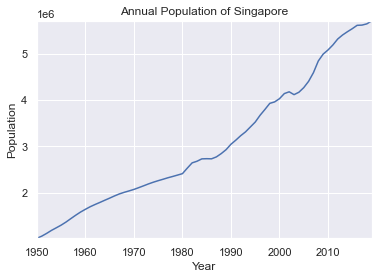

In [6]:
X = df1[['Year']].values
temp = df1['Population'].values
Y=np.zeros(70)
num=''
n=0

for y in temp:         #convert objects to string
    y=str(y)
    for i in y:
        if(i==','):
            i=''
        num=num+i
    Y[n]=num
    num=''
    n=n+1
Y=list(map(int,Y))#convert string to int
fig,ax=plt.subplots()
plot(X,Y,ax,'Annual Population of Singapore','Population')
plt.xlabel('Year')

The slope and the y-intercept are 63343.23 and -122692970.63 respectively
The corresponding R^2 coefficient is  0.961
The corresponding MSE is 50199962340.61025


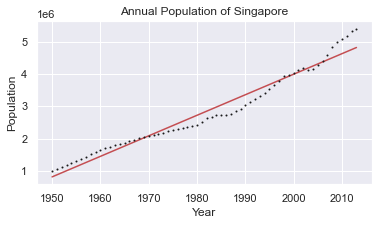

In [7]:
X_train=np.zeros(64)
Y_train=np.zeros(64)
differences=np.zeros(64)
for i in range(64):
    X_train[i]=X[i]
    Y_train[i]=Y[i]

lr = lm.LinearRegression()
lr.fit(X_train[:, np.newaxis], Y_train)
y_lr = lr.predict(X_train[:, np.newaxis])

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(X_train, y_lr, '-r')
ax.plot(X_train, Y_train, 'ok',ms=1)
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Annual Population of Singapore")
for i in range(63):
    differences[i]=abs(y_lr[i]-Y_train[i])**2
MSE=sum(differences)/64
print("The slope and the y-intercept are",round(lr.coef_[0],2),"and",round(lr.intercept_,2),"respectively")
print("The corresponding R^2 coefficient is ",round(lr.score(X_train.reshape(-1,1),Y_train),3))
print("The corresponding MSE is",MSE)

[4816943.83028847 4880287.05654763 4943630.28280678 5006973.50906594
 5070316.7353251  5133659.96158426]
The corresponding MSE is 828670934806.0063


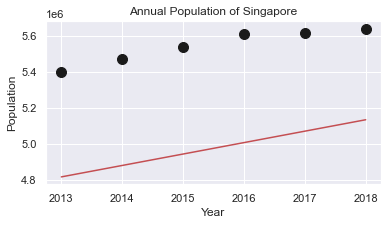

In [8]:
X_test=np.zeros(6)
Y_test=np.zeros(6)
for i in range(6):
    X_test[i]=X[i+63]
    Y_test[i]=Y[i+63]
y_pred=lr.predict(X_test[:,np.newaxis])
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(X_test, y_pred, '-r')
ax.plot(X_test, Y_test, 'ok',ms=10)
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Annual Population of Singapore")
for i in range(6):
    differences[i]=abs(y_pred[i]-Y_test[i])**2
MSE=sum(differences)/6
print(y_pred)
print("The corresponding MSE is",MSE)

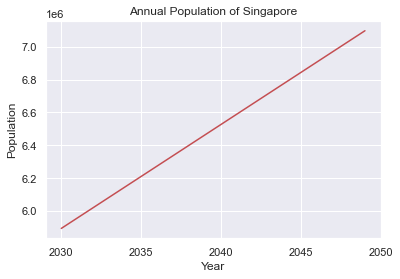

In [9]:
X2_test=np.zeros(20)
for i in range(20):
    X2_test[i]=2030+i
y2_pred=lr.predict(X2_test[:,np.newaxis])


plt.plot(X2_test, y2_pred, '-r')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Annual Population of Singapore")
x=np.linspace(2030,2050,5)
plt.xticks(x)
plt.show()

Task 3

In [10]:
df2=pd.read_csv("Annual Population of China.csv")

In [11]:
df2.dtypes

Year          int64
Population    int64
dtype: object

In [12]:
len(df2)

60

In [13]:
df2.head(5)

,Year,Population
0,1960,667070000
1,1961,660330000
2,1962,665770000
3,1963,682335000
4,1964,698355000


In [14]:
df2.tail()

,Year,Population
55,2015,1371220000
56,2016,1378665000
57,2017,1386395000
58,2018,1392730000
59,2019,1397715000


Text(0.5, 0, 'Year')

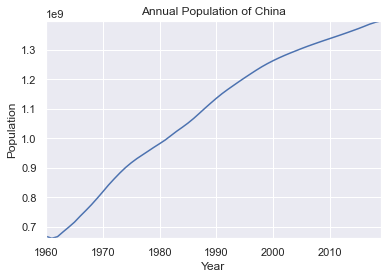

In [15]:
X=df2[['Year']].values
Y=df2[['Population']].values

fig,ax=plt.subplots()
plot(X,Y,ax,'Annual Population of China','Population')
plt.xlabel("Year")

The slope and the y-intercept are 13986466.36 and -26728908297.95 respectively
The corresponding R^2 coefficient is  0.983
The corresponding MSE is 835824080317124.9


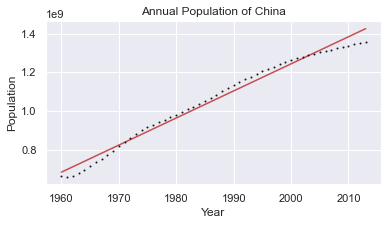

In [16]:
X_train=np.zeros(54)
Y_train=np.zeros(54)
differences=np.zeros(54)
for i in range(54):
    X_train[i]=X[i]
    Y_train[i]=Y[i]
    
lr2=lm.LinearRegression()
lr2.fit(X_train[:,np.newaxis],Y_train)
y_lr=lr2.predict(X_train[:,np.newaxis])

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(X_train, y_lr, '-r')
ax.plot(X_train, Y_train, 'ok',ms=1)
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Annual Population of China")
for i in range(54):
    differences[i]=abs(y_lr[i]-Y_train[i])**2
MSE=sum(differences)/54
print("The slope and the y-intercept are",round(lr2.coef_[0],2),"and",round(lr2.intercept_,2),"respectively")
print("The corresponding R^2 coefficient is ",round(lr2.score(X_train.reshape(-1,1),Y_train),3))
print("The corresponding MSE is",MSE)

[1.42584849e+09 1.43983495e+09 1.45382142e+09 1.46780789e+09
 1.48179435e+09 1.49578082e+09]
The corresponding MSE is 1.237175103934565e+16


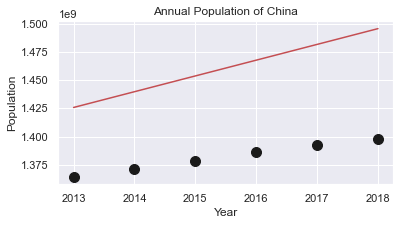

In [17]:
Y_test=np.zeros(6)
for i in range(6):
    Y_test[i]=Y[i+54]
    
y_pred=lr2.predict(X_test[:,np.newaxis])

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(X_test, y_pred, '-r')
ax.plot(X_test, Y_test, 'ok',ms=10)
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Annual Population of China")
for i in range(6):
    differences[i]=abs(y_pred[i]-Y_test[i])**2
MSE=sum(differences)/6
print(y_pred)
print("The corresponding MSE is",MSE)

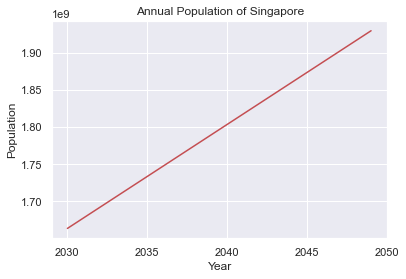

In [18]:
X2_test=np.zeros(20)
for i in range(20):
    X2_test[i]=2030+i
y2_pred=lr2.predict(X2_test[:,np.newaxis])


plt.plot(X2_test, y2_pred, '-r')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Annual Population of Singapore")
x=np.linspace(2030,2050,5)
plt.xticks(x)
plt.show()